
# Linear Regression: Univariate

---
This script contains examples on how to train and test a linear regression model in Python. For executing the script, you will need to download the dataset "Admission_Predict.csv".

**Note on importing libraries:**

General syntax to import specific functions in a library:
*from (library) import (specific library function)*
*from pandas import DataFrame*

General syntax to import a library but no functions:
*import (library) as (give the library a nickname/alias)*
*import matplotlib.pyplot as plt*
*import pandas as pd *

**Libraries:**

**Pandas** -- is a software library written for the Python programming language for data manipulation and analysis (dataframes, reading and writing, data alignment, reshaping, slicing, indexing, data structure insertion and deletion, merging, time series functionality etc.

**NumPy** -- is a library for Python adding support for large, multi-dimnesional arrays and matrices, along with a large collection of high-level matematical functions to operate on these arrays.


**Matplotlib** -- is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

**Seaborn** -- is a Python data visualization library based on matplotlib (It is used to create more attractive and informative statistical graphics. While seaborn is a different package, it can also be used to develop the attractiveness of matplotlib graphics).

**os** - is a module that provides easy functions allowing us to interact and get Operating System information and even control processes up to a limit.

**io** - is a module that provides the Python interfaces to stream handling.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os
import io
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics


In [ ]:
# To make this notebook's output stable across runs (we make the output reproducable)
np.random.rand(42)

array([0.03142919, 0.63641041, 0.31435598, 0.50857069, 0.90756647,
       0.24929223, 0.41038292, 0.75555114, 0.22879817, 0.07697991,
       0.28975145, 0.16122129, 0.92969765, 0.80812038, 0.63340376,
       0.87146059, 0.80367208, 0.18657006, 0.892559  , 0.53934224,
       0.80744016, 0.8960913 , 0.31800347, 0.11005192, 0.22793516,
       0.42710779, 0.81801477, 0.86073058, 0.00695213, 0.5107473 ,
       0.417411  , 0.22210781, 0.11986537, 0.33761517, 0.9429097 ,
       0.32320293, 0.51879062, 0.70301896, 0.3636296 , 0.97178208,
       0.96244729, 0.2517823 ])

In [ ]:
print?

In [ ]:
# Let's generate some linear looking data:
# Note: numpy.random.randn generates samples from the normal distribution, while numpy.random.rand from unifrom
X = 2 * np.random.rand(100, 1)

In [ ]:
y = 4 + 3 * X + np.random.randn(100, 1) # notice a difference between the function to generate X and y? The former draws from a uniform distribution and the latter from a normal distribution.

In [ ]:
 print(np.c_[X, y])  # Translates slice objects to concatenation along the second axis.

[[9.94497012e-01 6.76002825e+00]
 [6.01756620e-01 6.51927035e+00]
 [5.69680989e-01 6.18228059e+00]
 [7.37738947e-02 4.14849277e+00]
 [1.21912867e+00 6.81059229e+00]
 [1.00535805e+00 5.50122691e+00]
 [1.02957502e-01 3.86235756e+00]
 [5.57292928e-01 6.52827758e+00]
 [1.81653177e+00 9.66368906e+00]
 [4.79123781e-01 4.19163257e+00]
 [2.89789744e-01 5.04255016e+00]
 [9.78905521e-01 7.32203394e+00]
 [1.97130091e+00 9.03004529e+00]
 [4.84110543e-01 5.60605674e+00]
 [1.34427109e+00 8.09102200e+00]
 [1.52323923e+00 7.42674739e+00]
 [4.75275088e-01 5.78361262e+00]
 [1.45643270e+00 8.93008262e+00]
 [7.35566265e-01 7.28975004e+00]
 [1.26461166e+00 8.84763704e+00]
 [1.26705942e+00 6.42350890e+00]
 [1.07154937e+00 6.27682306e+00]
 [1.80579540e-01 5.05677389e+00]
 [1.67060499e+00 9.52560092e+00]
 [6.41560130e-01 6.43972808e+00]
 [3.73037021e-01 8.97184255e+00]
 [8.15502831e-02 4.81554136e+00]
 [1.18178589e+00 8.68092330e+00]
 [1.35512872e+00 9.01938793e+00]
 [3.31756579e-02 4.75091822e+00]
 [1.024186

In [ ]:
# Let's plot (info on the marker and the color --> https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html)
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.axis([0, 2, 0, 12])

(0.0, 2.0, 0.0, 12.0)

In [ ]:
# Training a linear model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() # create an object for the linear regression
lin_reg.fit(X, y) # fit the data
Y_predict = lin_reg.predict(X)


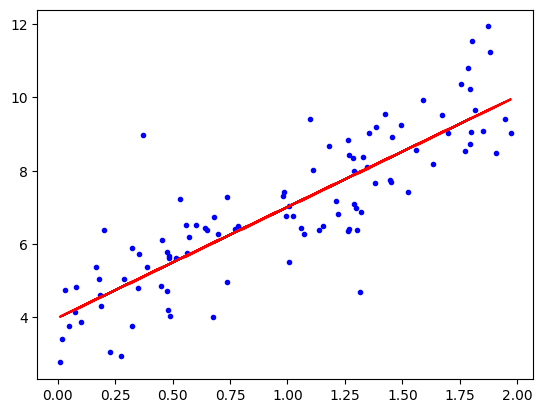

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X, Y_predict, color='red')
plt.show()

In [ ]:
X_new = np.array([[0.5], [1.75]])
y_predict = lin_reg.predict(X_new)
y_predict

array([[5.49715217],
       [9.28070179]])

**Let's try with real data**

---

Read CSV file = Admission_Predict.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving banking.csv to banking.csv


In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded['banking.csv']))

In [ ]:
dataset.head()

GRE_score  Admit
0        337   0.92
1        324   0.76
2        316   0.72
3        322   0.80
4        314   0.65

In [ ]:
dataset.tail()

age  marital            education housing loan    contact  duration  \
41183   59  married          high.school      no  yes  telephone       222   
41184   31  married             basic.4y      no   no  telephone       196   
41185   42   single    university.degree     yes  yes  telephone        62   
41186   48  married  professional.course      no  yes  telephone       200   
41187   25   single          high.school      no   no  telephone       112   

       campaign  pdays  previous     poutcome  emp_var_rate  cons_price_idx  \
41183         1    999         0  nonexistent           1.4          94.465   
41184         2    999         0  nonexistent           1.1          93.994   
41185         3    999         0  nonexistent           1.1          93.994   
41186         2    999         0  nonexistent          -3.4          92.431   
41187         4    999         0  nonexistent           1.1          93.994   

       cons_conf_idx  euribor3m  nr_employed  y  
41183          -41.8      4.866       5228.1  0  
41184          -36.4      4.860       5191.0  0  
41185          -36.4      4.857       5191.0  0  
41186          -26.9      0.742       5017.5  0  
41187          -36.4      4.859       5191.0  0

In [ ]:
dataset.shape # Returns the dimensions of the array.

(41188, 17)

In [ ]:
dataset.dtypes # Returns the dtypes in the DataFrame.

age                 int64
marital            object
education          object
housing            object
loan               object
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [ ]:
# Check for NAS
dataset.isna().any() # Generate a boolean mask indicating missing values

age               False
marital           False
education         False
housing           False
loan              False
contact           False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
y                 False
dtype: bool

In [ ]:
dataset.isna().sum()

age               0
marital           0
education         0
housing           0
loan              0
contact           0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [ ]:
# Describe the data
dataset.describe()

print(dataset.columns)

Index(['age', 'marital', 'education', 'housing', 'loan', 'contact', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [ ]:
# Select the target and independent variables
X = dataset['loan'].values.reshape(-1,1)  # -1 in reshape function is used when you dont know or want to explicitly tell the dimension of that axis.
y = dataset['age'].values.reshape(-1,1)

In [ ]:
# Scatter plot
plt.scatter(X.ravel(), y.ravel(), marker='.') # Changed here to flatten the arrays
plt.xlabel('loan')
plt.ylabel('age')
plt.show()

In [ ]:
# Check the correlations
corrmat = dataset.corr()
corrmat

GRE_score    Admit
GRE_score    1.00000  0.80261
Admit        0.80261  1.00000

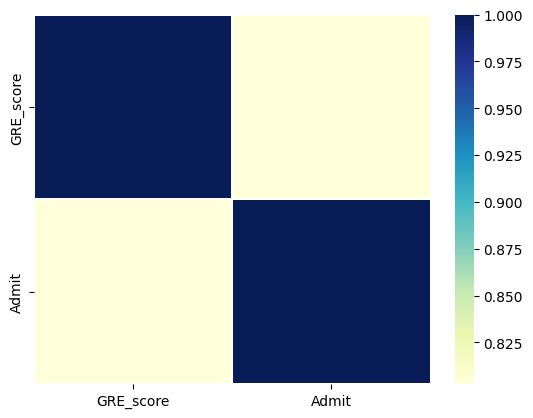

In [ ]:
# Plot correlation heatmap
sns.heatmap(corrmat, cmap ="YlGnBu", linewidths=0.1)
# sns.heatmap(corrmat, cmap="Blues")
# sns.heatmap(corrmat, cmap="BuPu")
# sns.heatmap(corrmat, cmap="Greens")
plt.show()

In [ ]:
# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 20% in testing; we set random_state, as everytime you run it without specifying random_state, you will get a different result
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 1)
(80, 1)
(320, 1)
(80, 1)


In [ ]:
# Fit the model on training set
model = LinearRegression()
model.fit(X_train, y_train) # training the algorithm

LinearRegression()

In [ ]:
# Get coefficients
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)
print('\nThe fitted model is y=', round(model.coef_[0][0], 2), '* x +', round(model.intercept_[0], 2))

Intercept: [-2.48075999]
Slope: [[0.01012352]]

The fitted model is y= 0.01 * x + -2.48


In [ ]:
# Get fitted value on test set
y_test_predicted = model.predict(X_test)

# Compare predictions
pd.DataFrame({'True': y_test.flatten(), 'Predicted': y_test_predicted.flatten()}) # .flatten --> collapses an array into one dimension

True  Predicted
0   0.71   0.647408
1   0.70   0.637285
2   0.79   0.819508
3   0.73   0.617037
4   0.72   0.718273
..   ...        ...
75  0.61   0.667655
76  0.69   0.617037
77  0.62   0.687902
78  0.93   0.900496
79  0.43   0.525926

[80 rows x 2 columns]

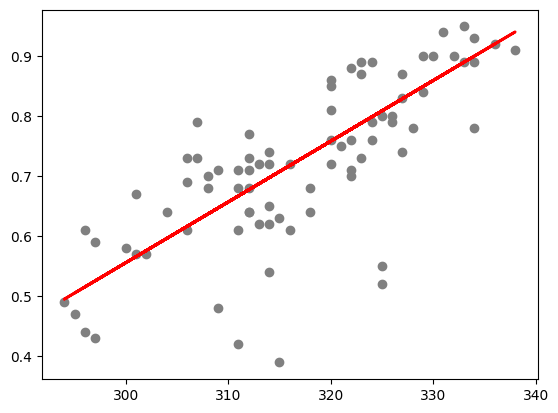

In [ ]:
# Plot model
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_test_predicted, color='red', linewidth=2)
plt.show()

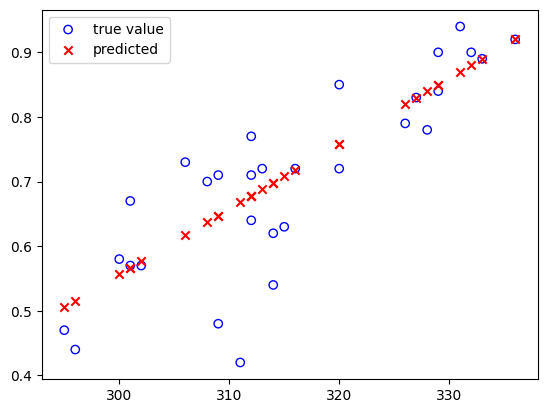

In [ ]:
# Plot some predicted vs true values
points_to_plot=30
plt.scatter(X_test[:points_to_plot], y_test[:points_to_plot],  color='blue', marker='o', facecolors='none', label='true value')
plt.scatter(X_test[:points_to_plot], y_test_predicted[:points_to_plot],  color='red', marker='x', label='predicted')
plt.legend()
plt.show()

In [ ]:
# Evaluate Root Mean Square Error (RMSE)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted))
print('Root Mean Squared Error on test set:', RMSE_test)
print('Mean of y_test:', y_test.mean())

Root Mean Squared Error on test set: 0.09085202906131923
Mean of y_test: 0.7151249999999999


In [ ]:
# Evaluate R-squared
R2 = metrics.r2_score(y_test, y_test_predicted)
print('R-squared:', R2)


**Linear regression for forecasting**

---

In this next section, we aim to train a linear model that will predict the Close price of the Bitcoin cryptocurrency.

In [ ]:
# Let's import the dataset including Bitcoin prices
from google.colab import files
uploaded = files.upload()

Saving data_BTC.csv to data_BTC.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['data_BTC.csv']))

In [ ]:
# Let's check if we imported correctly
data.head()

Date  BTC-USD.Close
0  01.01.22    47686.81250
1  02.01.22    47345.21875
2  03.01.22    46458.11719
3  04.01.22    45897.57422
4  05.01.22    43569.00391

In [ ]:
# Let's get some summary stats on the prices
data.describe()

BTC-USD.Close
count     661.000000
mean    27437.022826
std      7923.156335
min     15787.284180
25%     20976.298830
50%     26753.826170
75%     30249.132810
max     47686.812500

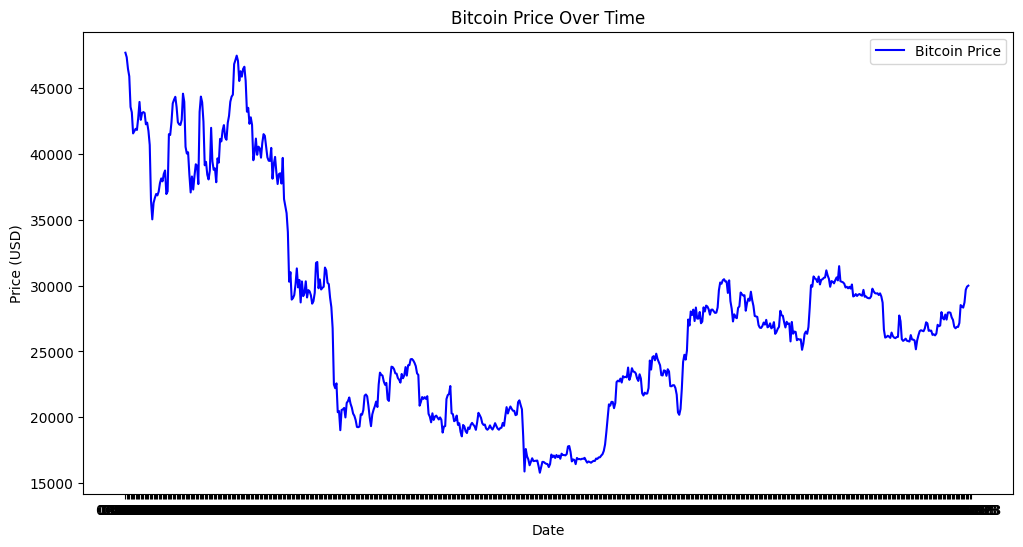

In [ ]:
# Let's plot the movement of the BTC Close Price
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['BTC-USD.Close'], label='Bitcoin Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Over Time')
plt.legend()


In [ ]:
# We can use a linear model to forecast (predict) the close price of the Bitcoin at t+1 by using certain amount of lagged prices.
# So let's create lag features. Specifically, we are defining a function to create the lag values.
def create_lagged_features(data, lag):
    for i in range(1, lag+1):
        data[f'lag_{i}'] = data['BTC-USD.Close'].shift(i)
    data.dropna(inplace=True)
    return data

In [ ]:
# Create lag features with a lag of 20 days
data = create_lagged_features(data, lag=20)

In [ ]:
data.head()

Date  BTC-USD.Close        lag_1        lag_2        lag_3  \
20  21.01.22    36457.31641  40680.41797  41744.32813  42375.63281   
21  22.01.22    35030.25000  36457.31641  40680.41797  41744.32813   
22  23.01.22    36276.80469  35030.25000  36457.31641  40680.41797   
23  24.01.22    36654.32813  36276.80469  35030.25000  36457.31641   
24  25.01.22    36954.00391  36654.32813  36276.80469  35030.25000   

          lag_4        lag_5        lag_6        lag_7        lag_8  ...  \
20  42250.55078  43113.87891  43177.39844  43099.69922  42591.57031  ...   
21  42375.63281  42250.55078  43113.87891  43177.39844  43099.69922  ...   
22  41744.32813  42375.63281  42250.55078  43113.87891  43177.39844  ...   
23  40680.41797  41744.32813  42375.63281  42250.55078  43113.87891  ...   
24  36457.31641  40680.41797  41744.32813  42375.63281  42250.55078  ...   

         lag_11       lag_12       lag_13       lag_14       lag_15  \
20  41821.26172  41911.60156  41733.94141  41557.90234  43160.92969   
21  42735.85547  41821.26172  41911.60156  41733.94141  41557.90234   
22  43949.10156  42735.85547  41821.26172  41911.60156  41733.94141   
23  42591.57031  43949.10156  42735.85547  41821.26172  41911.60156   
24  43099.69922  42591.57031  43949.10156  42735.85547  41821.26172   

         lag_16       lag_17       lag_18       lag_19       lag_20  
20  43569.00391  45897.57422  46458.11719  47345.21875  47686.81250  
21  43160.92969  43569.00391  45897.57422  46458.11719  47345.21875  
22  41557.90234  43160.92969  43569.00391  45897.57422  46458.11719  
23  41733.94141  41557.90234  43160.92969  43569.00391  45897.57422  
24  41911.60156  41733.94141  41557.90234  43160.92969  43569.00391  

[5 rows x 22 columns]

In [ ]:
# Split the data into training and testing sets. Remember: We never use the full dataset for training. We always split the data and use portion for training and portion for testing.
X = data.drop(['Date','BTC-USD.Close'], axis=1)
y = data['BTC-USD.Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the summary, which includes coefficients and p-values
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:          BTC-USD.Close   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.885e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        09:43:01   Log-Likelihood:                         -4154.4
No. Observations:                 512   AIC:                                      8349.
Df Residuals:                     492   BIC:                                      8434.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the r2
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error on Test Set: {rmse:.2f}")
print(f"R-squared on Test Set: {r2:.2f}")

Root Mean Squared Error on Test Set: 875.06
R-squared on Test Set: 0.99


In [ ]:
for true, predicted in zip(y_test, y_pred):
    print(f"True: {true:.2f}, Predicted: {predicted:.2f}")

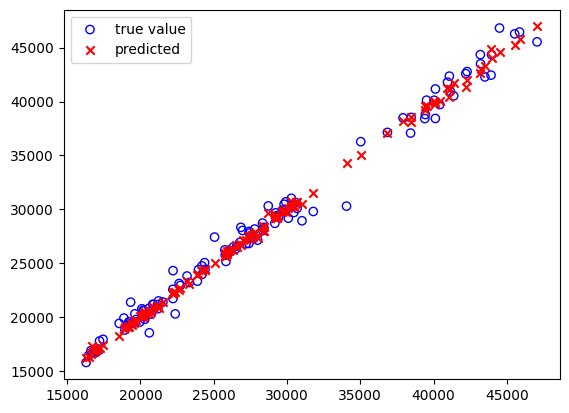

In [ ]:
# Let's plot
plt.scatter(X_test.iloc[:, 0], y_test,  color='blue', marker='o', facecolors='none', label='true value')
plt.scatter(X_test.iloc[:, 0], y_pred,  color='red', marker='x', label='predicted')
plt.legend()
plt.show()

**Linear regression assumes the following:**

---



1. **linear relationship** between regressor(s) and target
2. little or **no multicollinearity** between regressors
3. **homoscedasticity**, i.e. the variance of the error terms (i.e. residuals) doesn't vary too much for all observations
4. **normal distribution of error terms** (i.e. residuals)
5. no correlation between regressors and residuals or little or **no autocorrelation in residuals** for time series, i.e. correlation between  ùëíùë°  and  ùëíùë°‚àí1

In [ ]:
# Checking Assumption 1 - linear relationship between regressors and target
# Scatter plot of Y vs x

plt.scatter(X, y, marker='o')
plt.title('GRE score and the Chance of Being Admitted')
plt.xlabel('GRE score')
plt.ylabel('Chance of Being Admitted')
plt.show()

*Checking Assumption 2 - little to no multicolinearity between regressors *

There is only 1 regressor in a univeriate regression!

In [ ]:
# Checking Assumption 3 - Homoscedasticity
# Plot the residual and check their "shape"
residuals_test = y_test - y_test_predicted
plt.figure(figsize=(20,10))
plt.scatter(np.arange(0,len(residuals_test)), residuals_test, marker='o', facecolors='none', color='black', alpha=0.5)
plt.show()

In [ ]:
# Checking Assumption 4 - Normal distribution of residuals
# Check if residual distribution looks like a normal distribution with same mean and variance

resid_mean = residuals_test.mean()
resid_std = residuals_test.std()
normal_distr = np.random.normal(resid_mean, resid_std, len(residuals_test))

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20,10))
sns.distplot(residuals_test, ax=ax[0])
ax[0].set_title('Residual distribution', fontsize=20)
sns.distplot(normal_distr, ax=ax[1])
ax[1].set_title('Normal distribution', fontsize=20)
sns.distplot(residuals_test, label='residuals', ax=ax[2])
sns.distplot(normal_distr, label='normal\ndistribution', ax=ax[2])
ax[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=20)
plt.show()

In [ ]:
# Check QQ-plot, i.e. plotting the quantiles of residual against quantiles of normal distribution

percentile_set = np.linspace(0,100,10000) # set percentile 1%, 2%, 3%, etc
residual_percentile = np.percentile(residuals_test, percentile_set)
normal_percentile = np.percentile(normal_distr, percentile_set)

plt.scatter(normal_percentile, residual_percentile, marker='o', facecolor='none', color='blue')
plt.ylabel('residual percentiles', fontsize=20)
plt.xlabel('normal percentiles', fontsize=20)
# plot bisector
line = np.linspace(normal_percentile.min(), normal_percentile.max())
plt.plot(line, line, color="black", ls="dashed")
plt.show()

In [ ]:
# Checking Assumption 5 - Independence of residuals
# Check correlation between residuals and regressors
np.corrcoef(residuals_test.T, X_test.T)